<a href="https://colab.research.google.com/github/tankTopTaro/TensorFlow-Colab-Notebooks/blob/main/00_tensorflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Tensors

In [2]:
# Import TensorFlow
import tensorflow as tf

print(tf.__version__)

2.17.0


In [3]:
# Create tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [4]:
# Check the number of dimensions of a tensor
scalar.ndim

0

In [5]:
# Create a vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [6]:
vector.ndim

1

In [7]:
# Create a matrix
matrix = tf.constant([[10, 7], [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [8]:
matrix.ndim

2

In [9]:
another_matrix = tf.constant([[10.,7.], [3., 2.], [8., 9.]], dtype=tf.float16)  # specify the data type
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [10]:
another_matrix.ndim

2

In [11]:
# Create a tensor
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])

tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [12]:
tensor.ndim

3

### Creating tensors with tf.Variable

In [13]:
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [14]:
changeable_tensor[0] = 7
changeable_tensor

TypeError: 'ResourceVariable' object does not support item assignment

In [15]:
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [16]:
unchangeable_tensor[0].assign(7)
unchangeable_tensor

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

### Creating random tensors

In [17]:
random_1 = tf.random.Generator.from_seed(42)
random_1 = random_1.normal(shape=(3, 2))
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2))

random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

### Shuffle the order of elements in a tensor

In [18]:
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])

not_shuffled.ndim, not_shuffled

(2,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4],
        [ 2,  5]], dtype=int32)>)

In [19]:
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

In [20]:
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]], dtype=int32)>

### Exercise Generate 5 random tensors

[tf.random.set_seed](https://www.tensorflow.org/api_docs/python/tf/random/set_seed)

In [21]:
rand_1 = tf.random.Generator.from_seed(42, alg="threefry")
rand_2 = tf.random.Generator.from_seed(5).normal(shape=(10, 7))
rand_3 = tf.random.Generator.from_seed(100).normal(shape=(3, 2))
rand_4 = tf.random.Generator.from_seed(1234).normal(shape=(2, 3))
rand_5 = tf.random.Generator.from_seed(123, alg="philox")

print("Rand_1", rand_1, "\nRand_2", rand_2,
      "\nRand_3", rand_3, "\nRand_4", rand_4,
      "\nRand_5", rand_5)

Rand_1 <tensorflow.python.ops.stateful_random_ops.Generator object at 0x7cf272b9ebf0> 
Rand_2 tf.Tensor(
[[ 1.0278524   0.27974114 -0.01347923  1.845181    0.97061104 -1.0242516
  -0.6544423 ]
 [-0.29738766 -1.3240396   0.28785667 -0.8757901  -0.08857018  0.69211644
   0.84215707]
 [-0.06378496  0.92800784 -0.6039789  -0.1766927   0.04221033  0.29037967
  -0.29604465]
 [-0.21134205  0.01063002  1.5165398   0.27305737 -0.29925638 -0.3652325
   0.61883307]
 [-1.0130816   0.28291714  1.2132233   0.46988967  0.37944323 -0.6664026
   0.6054596 ]
 [ 0.19181173  0.8045827   0.4769051  -0.7812124  -0.996891    0.33149973
  -0.5445254 ]
 [ 1.5222508   0.59303206 -0.63509274  0.3703566  -1.0939722  -0.4601445
   1.5420506 ]
 [-0.16822556 -0.4390865  -0.4129243   0.35877243 -1.9095894  -0.2094769
   0.8286217 ]
 [-0.06695071 -0.35105535  1.0884082  -1.3863064   0.88051325 -1.6833194
   0.86754173]
 [-0.19625713 -1.322665   -0.02279496 -0.1383193   0.44207528 -0.7531523
   2.0261486 ]], shape=(10,

In [22]:
tf.random.shuffle(rand_3)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.08036723, -1.7199678 ],
       [-0.90112925, -0.0175216 ],
       [-0.4188493 ,  0.29532313]], dtype=float32)>

In [23]:
tf.random.shuffle(rand_4, seed=42)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 0.9356609 ,  1.0854305 , -0.93788373],
       [-0.5061547 ,  1.3169702 ,  0.7137579 ]], dtype=float32)>

### Other ways to create tensors

In [24]:
# Create a tensor of all ones
tf.ones([10, 7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [25]:
# Create a tensor of all zeros
tf.zeros(shape=(3, 3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

### Turning Numpy arrays into tensors

In [29]:
# Turning Numpy arrays into tensors
import numpy as np

# X = tf.constant(some_matrix) # Uppercase for matrix or tensor
# y = tf.constant(vector) # lowercase for vector

numpy_A = np.arange(1, 25, dtype=np.int32)
numpy_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [32]:
A = tf.constant(numpy_A, shape=(2, 3, 4))
B = tf.constant(numpy_A)
A, B

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

### Getting information from tensors

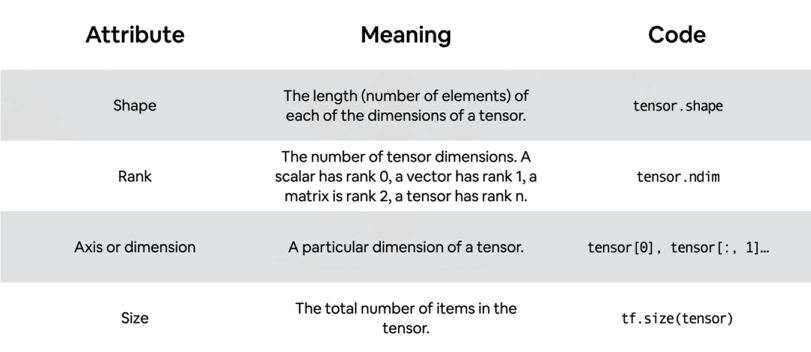

In [33]:
rank_4_tensor = tf.zeros([2, 3, 4, 5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [34]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [36]:
print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along the 0 axis:", rank_4_tensor.shape[0])
print("Elements along the last axis:", rank_4_tensor.shape[-1])
print("Total number of elements in the tensor:", tf.size(rank_4_tensor))
print("Total number of elements in the tensor:", tf.size(rank_4_tensor).numpy())

Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along the 0 axis: 2
Elements along the last axis: 5
Total number of elements in the tensor: tf.Tensor(120, shape=(), dtype=int32)
Total number of elements in the tensor: 120


### Indexing tensors

In [37]:
rank_4_tensor[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [38]:
some_list = [1, 2, 3, 4]

some_list[:1]

[1]

In [41]:
# Get the first element from each dimension from each index except for the final one
rank_4_tensor[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [42]:
# Create a rank 2 tensor
rank_2_tensor = tf.constant([[10, 7], [3, 4]])
rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [43]:
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [44]:
# Get the last item of each row of our rank 2 tensor
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [45]:
# Add in extra dimension to our rank 2 tensor
rank_3_tensor = rank_2_tensor[..., tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [46]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1)

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [47]:
tf.expand_dims(rank_2_tensor, axis=0)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

### Manipulating tensors (tensor operation)

In [48]:
# Addition
tensor = tf.constant([[10, 7],
                      [3, 4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [49]:
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [50]:
# Multiplication
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [51]:
# Subtraction
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [52]:
# Division
tensor / 10

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1. , 0.7],
       [0.3, 0.4]])>

In [53]:
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

### Matrix multiplication
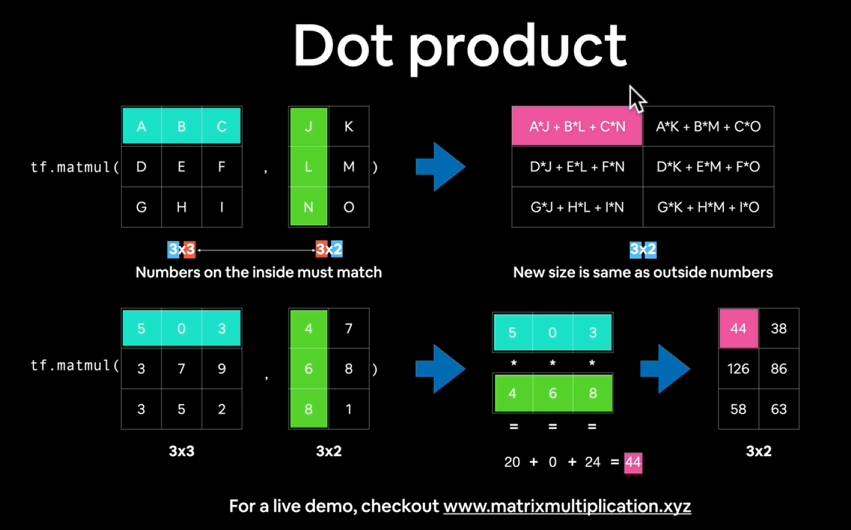

In [55]:
print(tensor)
tf.matmul(tensor, tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [63]:
matrix_1 = tf.constant([[1, 2, 5],
                        [7, 2, 1],
                        [3, 3, 3]])
matrix_2 = tf.constant([[3, 5],
                        [6, 7],
                        [1,8]])
matrix_3 = tf.constant([[1, 2],
                        [3, 4],
                        [5, 6]])
matrix_1, matrix_2, matrix_3

(<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
 array([[1, 2, 5],
        [7, 2, 1],
        [3, 3, 3]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[3, 5],
        [6, 7],
        [1, 8]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>)

In [62]:
# Matrix multiplication with Python operator "@"
matrix_1 @ matrix_2

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[20, 59],
       [34, 57],
       [30, 60]], dtype=int32)>

In [61]:
# Multiply tensors with different shapes
tf.matmul(matrix_1, matrix_2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[20, 59],
       [34, 57],
       [30, 60]], dtype=int32)>

In [64]:
# Multiply tensors of same shape
tf.matmul(matrix_2, matrix_3)

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2] [Op:MatMul] name: 

In [67]:
matrix_3

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [66]:
tf.reshape(matrix_3, shape=(2, 3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [68]:
tf.matmul(matrix_2, tf.reshape(matrix_3, shape=(2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[23, 31, 39],
       [34, 47, 60],
       [33, 42, 51]], dtype=int32)>

In [71]:
matrix_2, tf.transpose(matrix_3)

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[3, 5],
        [6, 7],
        [1, 8]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>)

In [72]:
tf.matmul(matrix_2, tf.transpose(matrix_3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[13, 29, 45],
       [20, 46, 72],
       [17, 35, 53]], dtype=int32)>

In [74]:
tf.tensordot(tf.transpose(matrix_2), matrix_3, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[26, 36],
       [66, 86]], dtype=int32)>

In [75]:
tf.matmul(matrix_2, tf.reshape(matrix_3, shape=(2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[23, 31, 39],
       [34, 47, 60],
       [33, 42, 51]], dtype=int32)>

In [76]:
print("Normal matrix_3:")
print(matrix_3, "\n")
print("matrix_3 reshaped to (2, 3):")
print(tf.reshape(matrix_3, shape=(2, 3)), "\n")
print("matrix_3 transposed:")
print(tf.transpose(matrix_3), "\n")

Normal matrix_3:
tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32) 

matrix_3 reshaped to (2, 3):
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32) 

matrix_3 transposed:
tf.Tensor(
[[1 3 5]
 [2 4 6]], shape=(2, 3), dtype=int32) 



### Changing the datatype of a tensor

In [77]:
B = tf.constant([1.7, 7.4])
B.dtype

tf.float32

In [78]:
C = tf.constant([7, 10])
C.dtype

tf.int32

In [81]:
# Change from float32 to float16
D = tf.cast(B, dtype=tf.float16)
D.dtype

tf.float16

### Aggregating tensors

* condensing them from multiple values down to a smaller amount of values.

In [108]:
E = tf.constant(np.random.randint(0, 100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([ 9, 86, 12, 50, 23,  5, 21, 67, 43, 18, 68, 28, 92, 22, 82, 91, 36,
        6, 13, 11, 70, 39, 60, 68, 93, 55, 36, 35, 71, 17, 66, 47, 93,  2,
       20, 41, 58, 15, 12, 49, 76,  8, 23, 23,  5, 78, 79, 80, 49,  7])>

In [99]:
tf.abs(E)

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([ 2, 32,  5, 16, 89, 28, 17, 59, 72, 75, 66, 95, 51, 61, 93, 16, 96,
       54, 89, 37, 90, 32, 33, 15, 44, 81, 23, 74, 53, 15, 31, 38, 79, 30,
       20, 98, 78, 20, 21, 68, 26, 32, 35, 50, 75, 74, 27, 25,  9, 45])>

In [101]:
# Get the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [102]:
# Get the maximum
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=98>

In [103]:
# Get the mean of a tensor
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=47>

In [104]:
# Get the sum of a tensor
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2394>

In [119]:
# Get the variance of a tensor
import tensorflow_probability as tfp
tfp.stats.variance(E), tf.math.reduce_variance(tf.cast(E, dtype=tf.float32))

(<tf.Tensor: shape=(), dtype=int64, numpy=826>,
 <tf.Tensor: shape=(), dtype=float32, numpy=826.45447>)

In [116]:
# Get the standard deviation
tf.math.reduce_std(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=28.748121>

### Find the positional maximum and minimum

In [120]:
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [122]:
# Get the Argmax
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [124]:
# Index on our largest value position
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [127]:
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [128]:
# Check for equality
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [123]:
# Get the Argmin
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [125]:
# Index on our smallest value position
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

In [129]:
tf.reduce_min(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

In [130]:
# Check for equality
F[tf.argmin(F)] == tf.reduce_min(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

### Squeezing a tensor

* removing all single dimension

In [131]:
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1, 1, 1, 1, 50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [132]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [133]:
G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       dtype=float32)>,
 TensorShape([50]))

### One-hot encoding tensors

In [134]:
# Create a list of indices
some_list = [0, 1, 2, 3]

# One-hot encode
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [137]:
tf.one_hot(some_list, depth=3)

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)>

In [136]:
# One-hot encode with custom values
tf.one_hot(some_list, depth=4, on_value="sup", off_value="hey")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'sup', b'hey', b'hey', b'hey'],
       [b'hey', b'sup', b'hey', b'hey'],
       [b'hey', b'hey', b'sup', b'hey'],
       [b'hey', b'hey', b'hey', b'sup']], dtype=object)>

### Square, log, square root

In [138]:
H = tf.range(1, 10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [139]:
# Square
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [142]:
# Square root
tf.sqrt(tf.cast(H, tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [144]:
# Log
tf.math.log(tf.cast(H, tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### Tensors and NumPy

In [145]:
J = tf.constant(np.array([3., 7., 10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [146]:
# Convert tensor back to a NumPy array
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [147]:
# Convert tensor to a Numpy array
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [149]:
numpy_J = tf.constant(np.array([3., 7., 10.]))
tensor_J = tf.constant([3., 7., 10.])

numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

### Finding access to GPUs


In [1]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
!nvidia-smi

Sat Sep 28 00:26:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--